### Discussion Related  with Outliers and Impact on Machine Learning

##### Which Machine Learning Models are Sensitive to Outliers?
1. Naive Bayes Classifier --------------------------- Not Sensitive to Outliers
2. SVM ---------------------------------------------- Not Sensitive to Outliers
3. Linear Regression -------------------------------- Sensitive to Outliers
4. Logistic Regression ------------------------------ Sensitive to Outliers
5. Decision Tree Regressor or Classifier ------------ Not Sensitive to Outliers
6. Ensemble(Random Forest, XGboost, Gradient Boost) - Not Sensitive to Outliers
7. KNN ---------------------------------------------- Not Sensitive to Outliers
8. Kmeans ------------------------------------------- Sensitive to Outliers
9. Hierarchial Clustering --------------------------- Sensitive to Outliers
10. PCA --------------------------------------------- Sensitive to Outliers
11. DBSCAN ------------------------------------------ Sensitive to Outliers
12. Neural Networks --------------------------------- Sensitive to Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

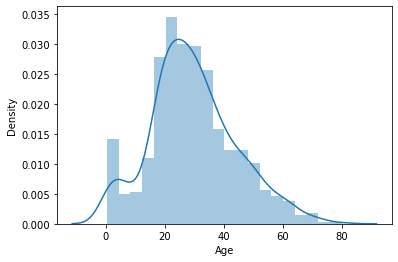

In [6]:
sns.distplot(df['Age'].dropna())

#### Gaussian Distributed

Text(0, 0.5, 'No of Passenger')

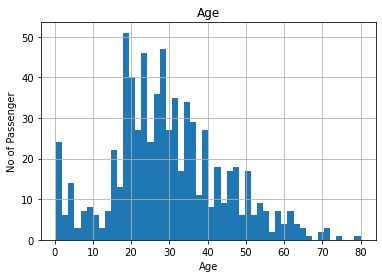

In [7]:
figure = df['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

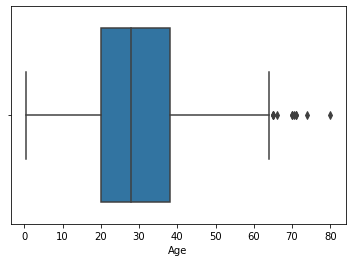

In [13]:
sns.boxplot(df['Age'])

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
##### Assuming Age follows a Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = df["Age"].mean() + 3* df['Age'].std()
lower_boundary = df["Age"].mean() - 3* df['Age'].std()

In [15]:
print(upper_boundary, lower_boundary, df['Age'].mean())

73.27860964406095 -13.88037434994331 29.69911764705882


#### Compute IQR (InterQuantile Range)

In [16]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

In [17]:
IQR

17.875

In [18]:
lower_bridge = IQR*1.5 - df['Age'].quantile(0.25)

In [19]:
lower_bridge

6.6875

In [20]:
upper_bridge = IQR*1.5 + df["Age"].quantile(0.75)

In [21]:
(lower_bridge, upper_bridge)

(6.6875, 64.8125)

##### Only if skewed we use below

In [47]:
lower_extreme_bridge = IQR*3 - df['Age'].quantile(0.25)
upper_extreme_bridge = IQR*3 + df["Age"].quantile(0.75)

In [48]:
(lower_extreme_bridge,upper_extreme_bridge)

(33.5, 91.625)

#### If feature is Skewed

Text(0, 0.5, 'No of Passenger')

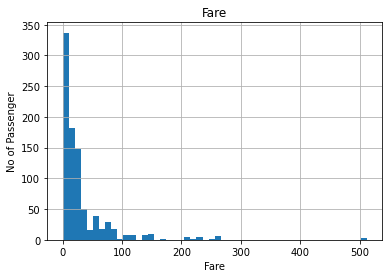

In [24]:
figure = df['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

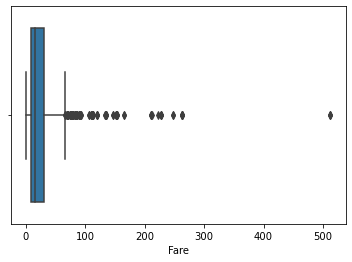

In [25]:
sns.boxplot(df['Fare'])

In [26]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
IQR_Fare = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
lower_bridge_Fare = IQR*1.5 - df['Fare'].quantile(0.25)
upper_bridge_Fare = IQR*1.5 + df["Fare"].quantile(0.75)

In [34]:
print("IQR_Fare", IQR_Fare)
print("lower_bridge_Fare", lower_bridge_Fare)
print("upper_bridge_Fare", upper_bridge_Fare)

IQR_Fare 23.0896
lower_bridge_Fare 18.9021
upper_bridge_Fare 57.8125


##### Extreme Outliers in Fare Column

In [35]:
lower_extreme_bridge_Fare = IQR_Fare*3 - df['Fare'].quantile(0.25)
upper_extreme_bridge_Fare = IQR_Fare*3 + df['Fare'].quantile(0.75)

In [36]:
lower_extreme_bridge_Fare,upper_extreme_bridge_Fare

(61.358399999999996, 100.2688)

In [38]:
# Dealing with Outliers for Age, Fare Columns

In [40]:
df.loc[df['Age']>=73,'Age'] = 73

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of Passenger')

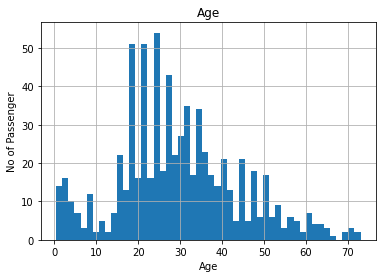

In [44]:
figure = df['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

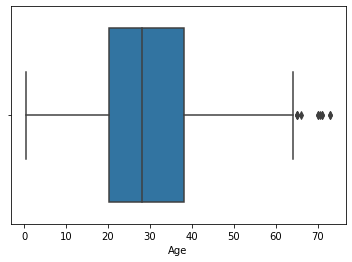

In [46]:
sns.boxplot(df['Age'])

In [42]:
df.loc[df['Fare']>=100,'Fare'] = 100

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of Passenger')

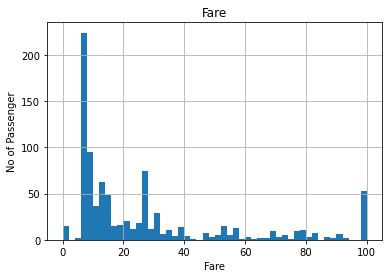

In [45]:
figure = df['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')